# EDA and Visualisation for Employee Performance Project

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from collections import Counter
import scipy
from scipy import stats

In [2]:
data=pd.read_excel('Employee_Performance.csv')

## Basic Analysis and Conclusion

In [3]:
data.shape

(1200, 28)

### There are 1200 Rows(Values for corresponding columns) and 28 Columns (Features/ Variables/Target/Parameters)

In [4]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [5]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

### This gives basic information about the raw dataset. 
### Their are 19 'int' valued features (Numerical Values) and 9 'object' (Categorial Values)

In [7]:
data.isnull().sum().sum()

0

### Their is No Null value is the entire Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5C1B00B70>,
      dtype=object)

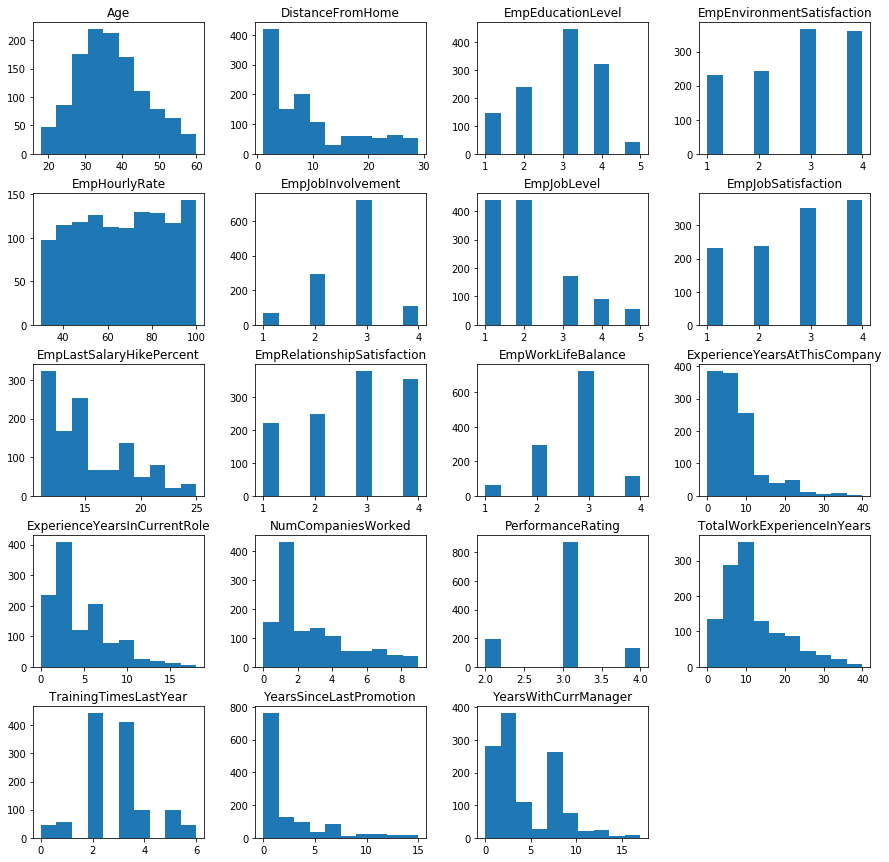

In [8]:
rcParams['figure.figsize']=15,15
data.hist(grid=False)

### Above is the Histogram of all the Numerical Value features and their distribution along the Dataset, this distribution is between the Min and Max value

## EDA

In [9]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### Above table describes Count, Mean (Average), Standard Deviation(Quantity of data occurance), Min ( Minimum Value in the column), Max (Maximum Value in the column), 25%( First Quartile -- 25% of the data is equal or less than Q1), 50%(Second Quartile/Usually Median -- 50% of the data is equal or less than Q2),75%(Third Quartile -- 75% of the data is equal or less than Q3)

In [10]:
# Mode of the features are evaluated below
var=data.columns
for v in var:
    print('\n',v)
    m=stats.mode(data[v])
    print(m[0],'|| Occurances =',m[1])


 EmpNumber


C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


['E1001000'] || Occurances = [1]

 Age
[34] || Occurances = [71]

 Gender
['Male'] || Occurances = [725]

 EducationBackground
['Life Sciences'] || Occurances = [492]

 MaritalStatus
['Married'] || Occurances = [548]

 EmpDepartment
['Sales'] || Occurances = [373]

 EmpJobRole
['Sales Executive'] || Occurances = [270]

 BusinessTravelFrequency
['Travel_Rarely'] || Occurances = [846]

 DistanceFromHome
[2] || Occurances = [184]

 EmpEducationLevel
[3] || Occurances = [449]

 EmpEnvironmentSatisfaction
[3] || Occurances = [367]

 EmpHourlyRate
[66] || Occurances = [25]

 EmpJobInvolvement
[3] || Occurances = [724]

 EmpJobLevel
[2] || Occurances = [441]

 EmpJobSatisfaction
[4] || Occurances = [378]

 NumCompaniesWorked
[1] || Occurances = [433]

 OverTime
['No'] || Occurances = [847]

 EmpLastSalaryHikePercent
[14] || Occurances = [172]

 EmpRelationshipSatisfaction
[3] || Occurances = [379]

 TotalWorkExperienceInYears
[10] || Occurances = [159]

 TrainingTimesLastYear
[2] || Occurance

### Mode(Maximum Number of Occurance) for all the Features/Parameter are described above, which would tell us which value have repeatedly occurred with number of occurance

In [11]:
data.kurtosis()

Age                            -0.431000
DistanceFromHome               -0.242017
EmpEducationLevel              -0.635594
EmpEnvironmentSatisfaction     -1.205577
EmpHourlyRate                  -1.186891
EmpJobInvolvement               0.368670
EmpJobLevel                     0.386338
EmpJobSatisfaction             -1.223147
NumCompaniesWorked              0.068863
EmpLastSalaryHikePercent       -0.299741
EmpRelationshipSatisfaction    -1.161828
TotalWorkExperienceInYears      0.805633
TrainingTimesLastYear           0.567531
EmpWorkLifeBalance              0.396607
ExperienceYearsAtThisCompany    4.057959
ExperienceYearsInCurrentRole    0.438029
YearsSinceLastPromotion         3.539080
YearsWithCurrManager            0.148202
PerformanceRating               0.674477
dtype: float64

### Kurtosis (Sharpness of the peak) of numerical value is determined , must be 3 for normal distribution anything below it meants flatter distribution above 3 is sharper peak distribution

In [12]:
data.skew()

Age                             0.384145
DistanceFromHome                0.962956
EmpEducationLevel              -0.250974
EmpEnvironmentSatisfaction     -0.307665
EmpHourlyRate                  -0.035165
EmpJobInvolvement              -0.557846
EmpJobLevel                     1.024053
EmpJobSatisfaction             -0.324276
NumCompaniesWorked              1.048635
EmpLastSalaryHikePercent        0.808654
EmpRelationshipSatisfaction    -0.318563
TotalWorkExperienceInYears      1.086862
TrainingTimesLastYear           0.532073
EmpWorkLifeBalance             -0.539231
ExperienceYearsAtThisCompany    1.789055
ExperienceYearsInCurrentRole    0.888159
YearsSinceLastPromotion         1.974932
YearsWithCurrManager            0.813158
PerformanceRating              -0.070576
dtype: float64

### The Skew (Distorted distribution) is determined with the above statement, it must be near Zero for normal distribution

C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

<Figure size 1080x1080 with 0 Axes>

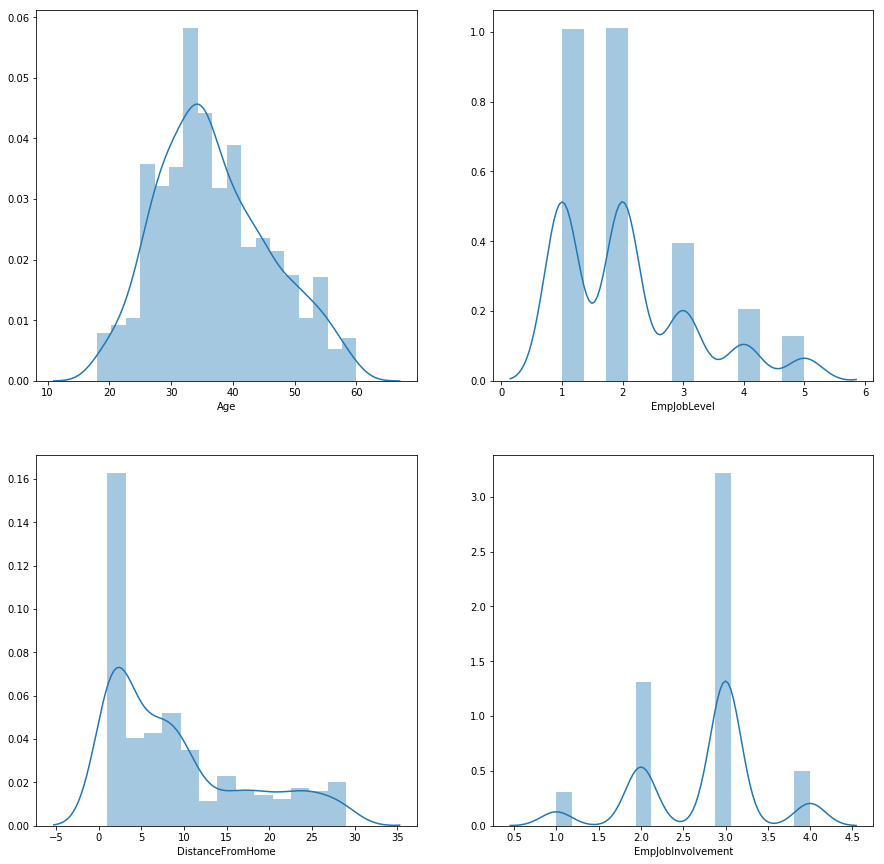

In [13]:
fig = plt.figure()
fig, ax = plt.subplots(2,2)
sns.distplot(data.Age,ax=ax[0,0])   # Near Normal Distribution - sharper peak
sns.distplot(data.EmpJobLevel,ax=ax[0,1]) # Non-Uniform Distribution - not that sharp peak
sns.distplot(data.DistanceFromHome,ax=ax[1,0]) # Positive Skew - much flatter peak
sns.distplot(data.EmpJobInvolvement,ax=ax[1,1]) # Negative Skew - much flatter peak

# I Department Wise Performance

### To Determine Mean (of Categorial Value) with respect to PerformanceRating for Department Wise Performance

In [14]:
ds=np.where(data.EmpDepartment=='Data Science',data.PerformanceRating,0)
dev=np.where(data.EmpDepartment=='Development',data.PerformanceRating,0)
fin=np.where(data.EmpDepartment=='Finance',data.PerformanceRating,0)
hr=np.where(data.EmpDepartment=='Human Resources',data.PerformanceRating,0)
rd=np.where(data.EmpDepartment=='Research & Development',data.PerformanceRating,0)
sales=np.where(data.EmpDepartment=='Sales',data.PerformanceRating,0)

In [15]:
Counter(data.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

In [16]:
print('mean_sales=',sales.sum()/373)
print('mean_hr=',hr.sum()/54)
print('mean_dev=',dev.sum()/361)
print('mean_ds=',ds.sum()/20)
print('mean_rd=',rd.sum()/343)
print('mean_fin=',fin.sum()/49)

mean_sales= 2.8605898123324396
mean_hr= 2.925925925925926
mean_dev= 3.085872576177285
mean_ds= 3.05
mean_rd= 2.9212827988338192
mean_fin= 2.7755102040816326



## From above mean value we can make out department wise performance. the mean value is the mean of PerformanceRating of particular EmpDepartment.

## Deductions from Mean Value

### We can see that the Performance mean of Development Dept is 3.08 which is higher than other dept, Close to this is Data Science dept. Thus dept wise performance can be related as follows:
### Development > Data Science > Human Resource > Research and Development > Sales > Finance

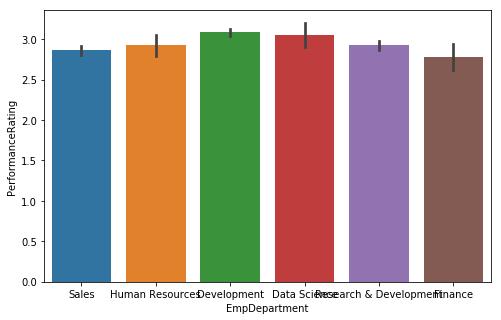

In [17]:
#Department-Wise Performance

rcParams['figure.figsize']=8,5
sns.barplot(data.EmpDepartment,data.PerformanceRating)

### Count of PerformanceRating

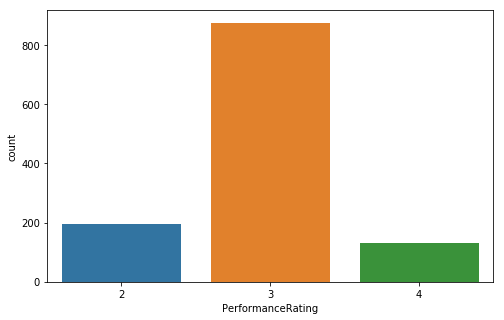

In [18]:
sns.countplot(data.PerformanceRating)

In [19]:
scipy.mean(data.PerformanceRating)

2.9483333333333333

# II Top Three Important Factor effecting the PerforamceRating

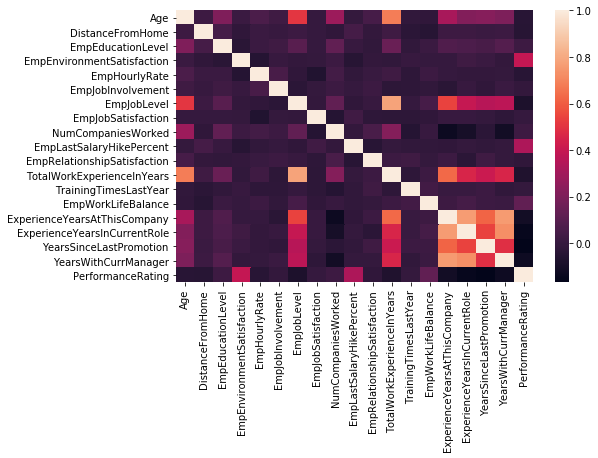

In [20]:
sns.heatmap(data.corr())

## This can be achieved by just looking at the correlation between the features. Higher the Correlation, More the effect of that feature on PerformanceRating. This is done by using Seaborn's Heatmap as shown above.

## Reading Heatmap --- Lighter the shade, more the correlation Between the features

### Now that  we know how to read a heatmap. Heatmap forms a symmetry along side the diagonal thus looking at row or column is the same thing.  Let us look into the PerformanceRating row/columns, almost all features are dark but the lighter ones among the dark gives us most correlated feature to the PerfomanceRating. From the Heatmap above we can tell the top 3 features effecting the performance.


### The First one being "EmpEnvironmentSatisfaction", which means the employee's working environment satisfaction. Well obviously working in a healthy environment would yield a better perforamance
### The Second one is "EmpLastSalaryHikePercent", which means the percent of hike in salary. If you are getting a hike for your hard work then any employee would be happly, thus increasing performance.
### The Last one is "EmpWorkLifeBalance", which means how employee manage their work and personal life. If that is managed well then it is sure that performance will be good. 



In [21]:
print('Correlation between Performance Rating and Employee Environment Satisfaction ------->',(data.PerformanceRating).corr(data.EmpEnvironmentSatisfaction))
print('Correlation between Performance Rating and Employee Last Salary Hike Percent ------->',(data.PerformanceRating).corr(data.EmpLastSalaryHikePercent))
print('Correlation between Performance Rating and Employee Work Life Balance ------->',(data.PerformanceRating).corr(data.EmpWorkLifeBalance))

Correlation between Performance Rating and Employee Environment Satisfaction -------> 0.3955609960685304
Correlation between Performance Rating and Employee Last Salary Hike Percent -------> 0.3337218215622466
Correlation between Performance Rating and Employee Work Life Balance -------> 0.12442896010503159


### NOTE: Not only by the Heatmap but we can understand the correlation by values as illustrated above. Larger positive value means larger correlation

In [22]:
data.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


### NOTE: Observe the last row that is PerformanceRating and its correlation with all the features

# Recommendations to improve the employee performance based on insights from analysis.

#### Majority of the PerformanceRating is about 3, which is good but can be better. The mean of the PerformanceRating is 2.94, which is close to 3. We know the top features affecting the performance rating. Improving those features such as Salary hike, Environment satisfaction, work life balance. Let correlated these 3 top features with other features to improve PerformanceRating overall.

#### Salary hike percent are slightly correlated with Distance from home and job satisfaction. Distance from home might not effect many employee but it is worth the consideration. Job satisfaction is key factor for salary hike as satisfaction would lead an employee to work with dedication. So consider Job satisfaction of employee.

#### Environment Satisfaction is correlated with Years in Current Role and Years since last promotion. if the role of an employee is fixed that would make the employee more reliable in that role and make an employee more comfortable to work at the role he desired. A little correlation is seen with year since last promotion, it doesnot affect much but promotion would make an employee believe in the organisation and thus satisfaction in the work.

#### Work life balance has little correlation with Job level, training time , and Experience in current role. Well the bar plot illustrated below tells us that lower levels perform better than higher level . At Early levels priority is work than life , but as u settle to the work and reach higher level life comes and takes over little work. Training time must be appropriate for better performance of the employee. Experience in the current role matters as employee would be familiar with work thus 10-15 years is better but after that employee gets frustated of his work. Giving more work to early level job would increase Overall Performance.

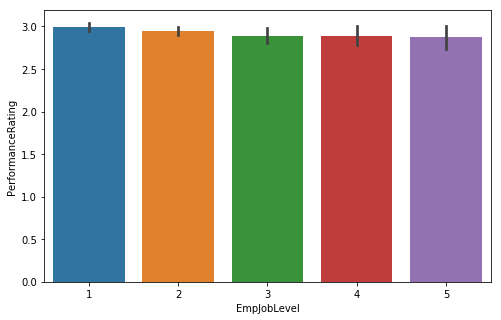

In [23]:
sns.barplot(data.EmpJobLevel,data.PerformanceRating)

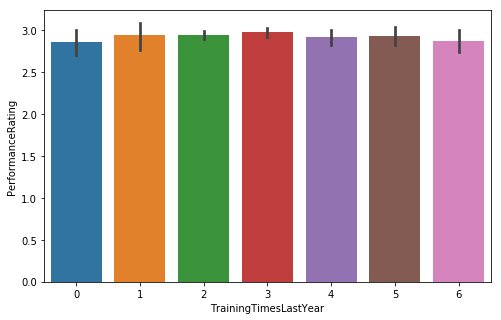

In [24]:
sns.barplot(data.TrainingTimesLastYear,data.PerformanceRating)

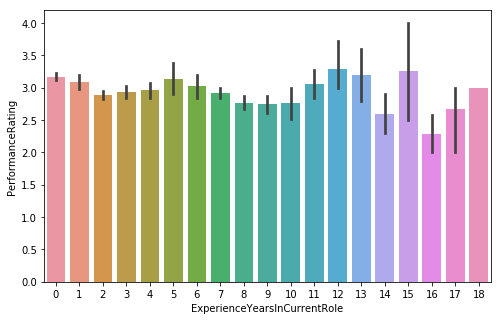

In [25]:
sns.barplot(data.ExperienceYearsInCurrentRole,data.PerformanceRating)